<center>
<img src="../../img/ml_theme.png">
# Майнор "Интеллектуальный анализ данных" 
# Курс "Введение в программирование"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: старший преподаватель ФКН НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="http://www.microsoft.com/en-us/openness/default.aspx#Ms-RL">Ms-RL</a>. Можно использовать в любых целях, но с обязательным упоминанием автора курса и аффилиации.

# <center>Семинар 13. Python для анализа данных. Средства визуализации. NumPy, Pandas, Matplotlib, Seaborn
## <center>Часть 4. Обзор библиотеки Seaborn. 

**Seaborn** - дополнение Matplotlib с API как для быстрого построения красивых графиков, так и для детальной кастомизации картинок для презентации.

In [19]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
%pylab inline
import seaborn as sns
figsize(6, 4)

Populating the interactive namespace from numpy and matplotlib


In [20]:
girls = pd.read_csv('../../data/girls.csv')
print(girls.head(10))

      Month  Year  Bust  Waist  Hips  Height  Weight
0  December  1953    91     61    91     165      54
1     March  1954    86     61    89     168      54
2      July  1955    91     61    91     166      52
3  December  1955    91     61    91     166      52
4      July  1956    91     61    86     157      48
5    August  1956    94     61    91     170      55
6   October  1956    91     61    91     166      52
7  November  1956    99     56    91     160      58
8  December  1956    89     58    89     157      48
9   January  1957    91     64    91     165      54


**Гистограммы. Метод <a href="https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html">distplot</a>**

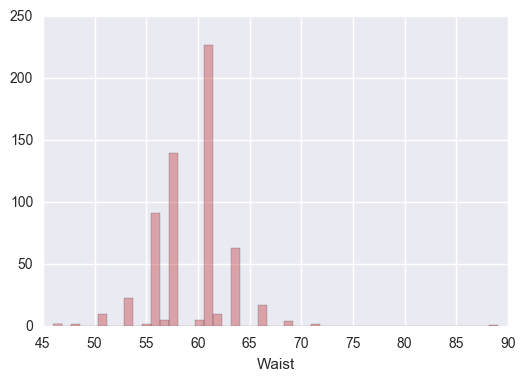

In [21]:
sns.distplot(girls['Waist'], kde=False);

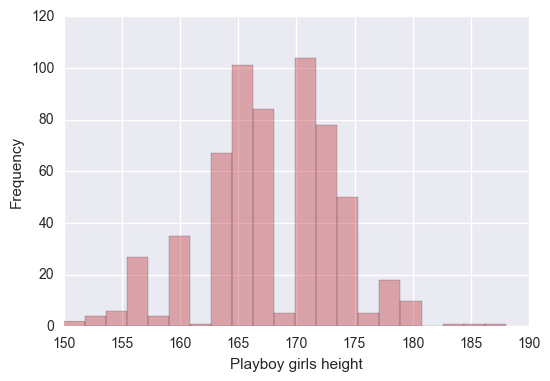

In [22]:
sns.distplot(girls['Height'], kde=False)
xlabel('Playboy girls height')
ylabel('Frequency')
sns.set_style('darkgrid');

In [23]:
girls['Year'].describe()

count     604.000000
mean     1983.057947
std        14.843740
min      1953.000000
25%      1970.000000
50%      1983.000000
75%      1996.000000
max      2009.000000
Name: Year, dtype: float64

**Метод <a href="https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html">boxplot</a>**
В наборе данных все признаки численные, так что создадим категорию "weight_cat" из 3 типов веса.

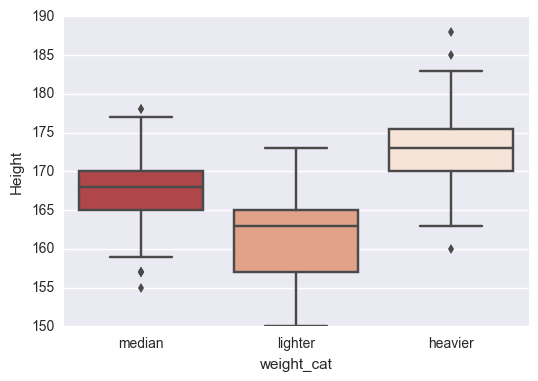

In [24]:
def weight_category(weight):
    return 'heavier' if weight > 54\
            else 'lighter' if weight < 49 else 'median'

girls['weight_cat'] = girls['Weight'].apply(weight_category)
sns.boxplot(x='weight_cat', y='Height', data=girls);

**Метод <a href="http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html">pairplot</a>**

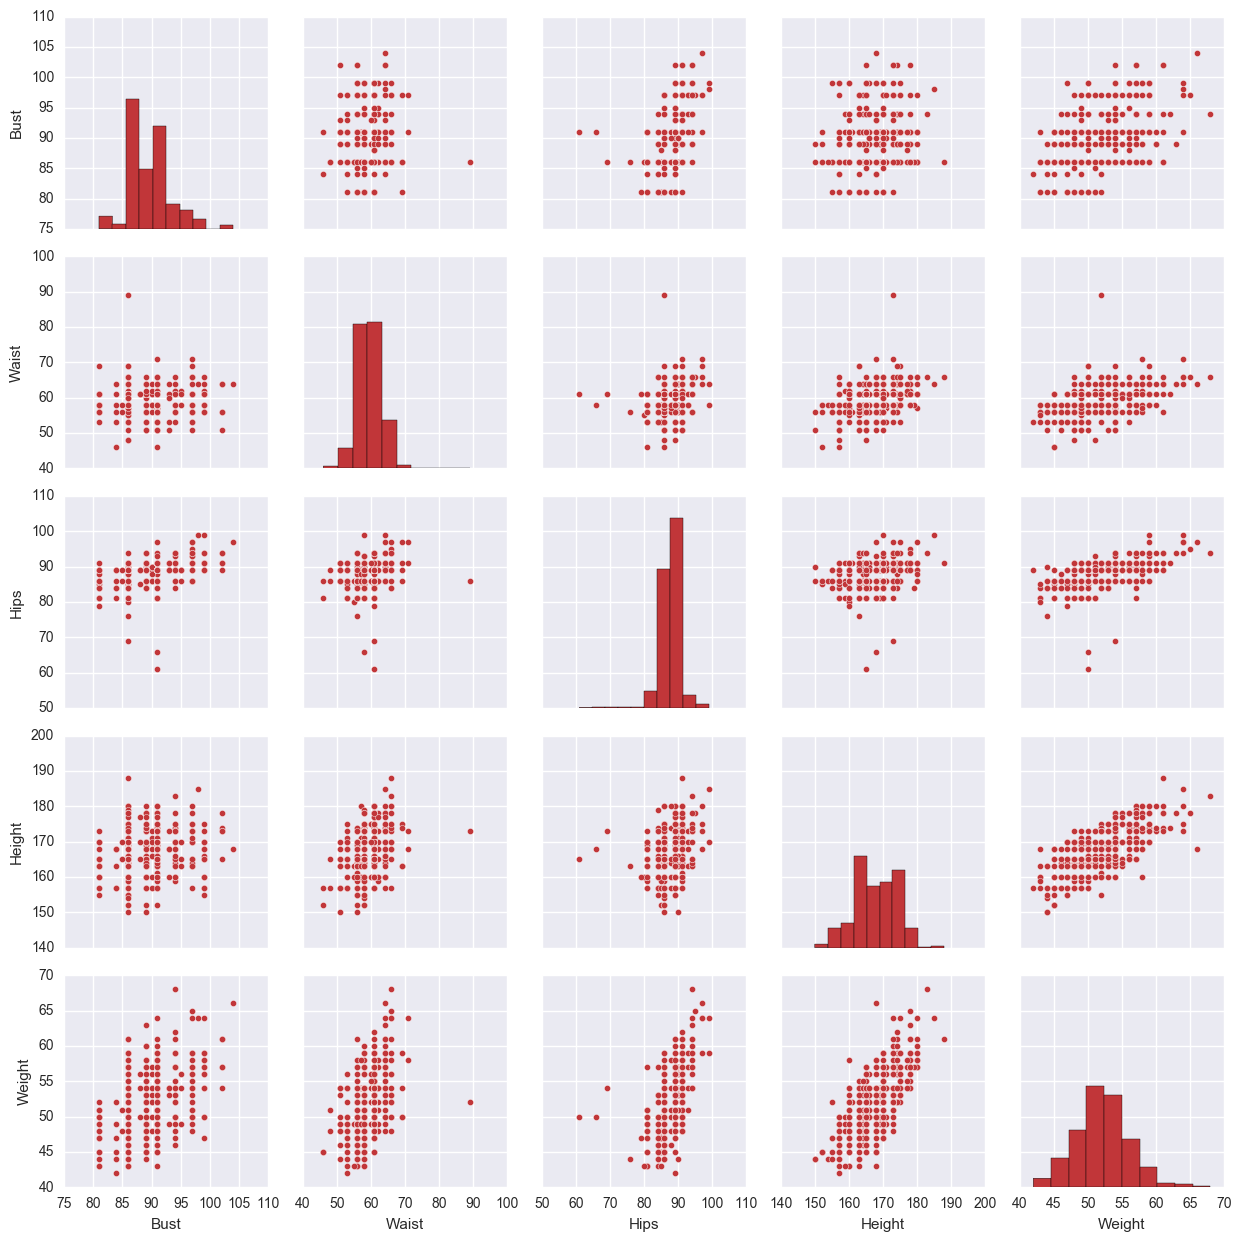

In [25]:
sns.set_palette(sns.color_palette("RdBu"))
sns.pairplot(girls[['Bust', 'Waist', 'Hips', 'Height', 'Weight']]);

**Метод <a href="http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.countplot.html">countplot</a>**

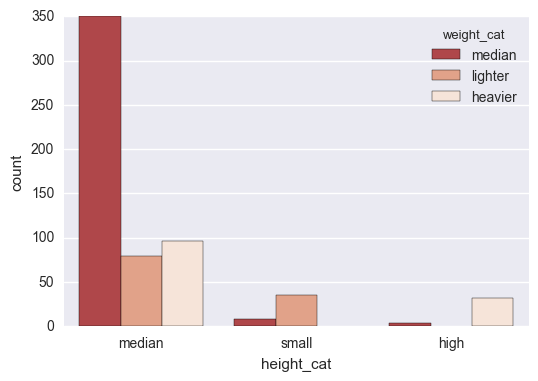

In [26]:
def height_category(height):
    return 'high' if height > 175\
            else 'small' if height < 160 else 'median'

girls['height_cat'] = girls['Height'].apply(height_category)
sns.countplot(x='height_cat', hue='weight_cat', data=girls);

## Пример визуального анализа данных с Pandas и Seaborn 

В 1968 году была [опубликована](http://www.ncbi.nlm.nih.gov/pubmed/5676802) статья под названием "Correlation of Performance Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in Human Subjects".

К статье приложен небольшой набор данных всего из 7 наблюдений.

In [27]:
data_types = {'Drugs': float,
              'Score': float}
df = pd.read_csv('../../data/drugs-and-math.csv', 
                 index_col=0, sep=',', dtype=data_types)

In [28]:
print(df.shape)
print(df.columns)
print(df.index)

(7, 2)
Index(['Drugs', 'Score'], dtype='object')
Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')


In [29]:
df

,Drugs,Score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65
5,6.00,32.92
6,6.41,29.97


**Таблица уже отсортирована по колонке Drugs, сделаем сортировку по Score.**

In [30]:
df.sort_values('Score', 
               ascending=False, 
               inplace=True)

In [31]:
df.describe().T # Иногда так лучше

,count,mean,std,min,25%,50%,75%,max
Drugs,7.0,4.332857,1.935413,1.17,3.115,4.69,5.915,6.41
Score,7.0,50.087143,18.610854,29.97,35.195,45.65,62.835,78.93


### Рисунки

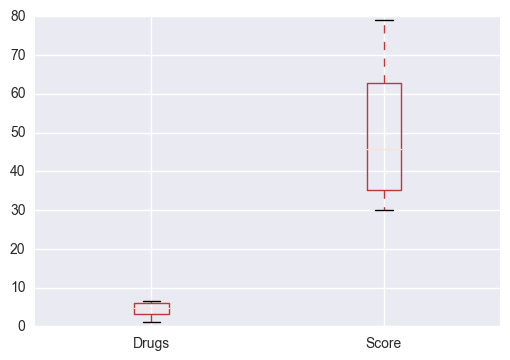

In [32]:
df.plot(kind='box');

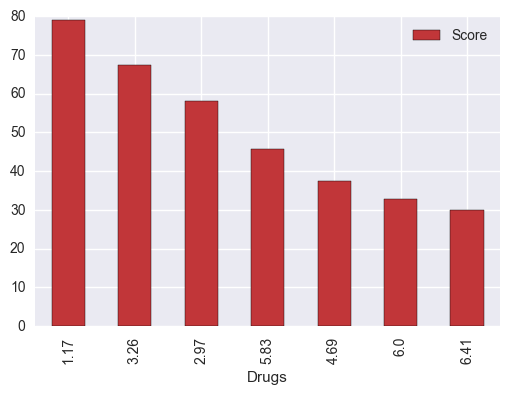

In [33]:
df.plot(x='Drugs', y='Score', kind='bar');

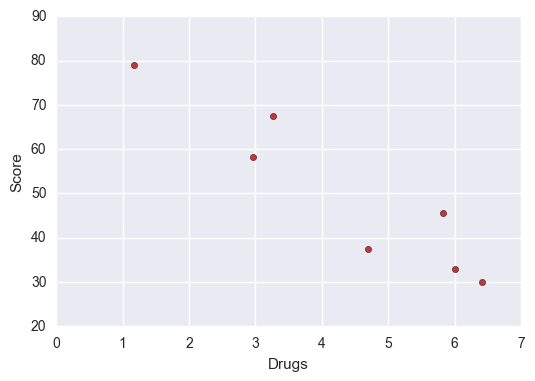

In [34]:
df.plot(x='Drugs', y='Score', kind='scatter');

**Видна тенденция...**

In [35]:
df.corr(method='pearson')

,Drugs,Score
Drugs,1.000000,-0.936928
Score,-0.936928,1.000000


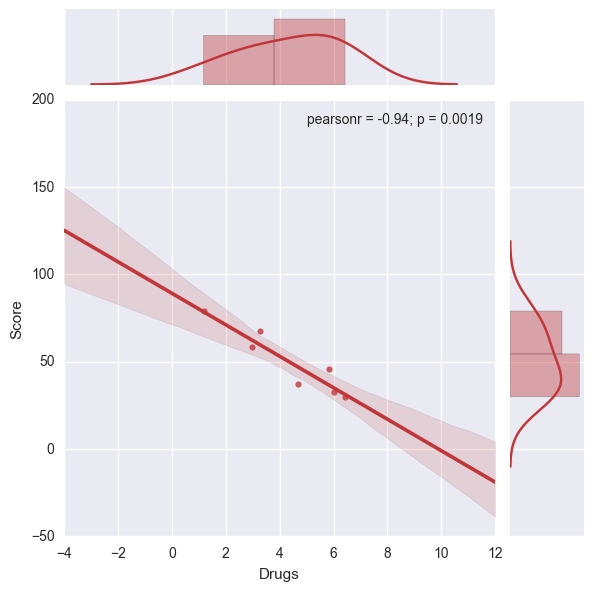

In [36]:
# sns.regplot(x='Drugs', y='Score', data=df)
sns.jointplot(x='Drugs', y='Score', 
              data=df, kind='reg');